<a href="https://colab.research.google.com/github/hyorangu/Study/blob/main/TextMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW1


### 1. 일반적인 텍스트로 품사 구분을 하고 텍스트에서 빈도가 높은 데이터로 그래프와 워드 클라우드를 그려라.

아래 위키문헌에서 무료 한국어 소설 및 텍스트 데이터를 다운로드 할 수 있다.

https://ko.wikisource.org/wiki/%EC%9C%84%ED%82%A4%EB%AC%B8%ED%97%8C:%EB%8C%80%EB%AC%B8

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with open('/content/drive/MyDrive/학교 실습 파일/camellia.txt', 'r', encoding='utf-8') as f:
    text = f.read().replace('\n','')

text

'동백꽃오늘도 또 우리 수탉이 막 쫓기었다. 내가 점심을 먹고 나무를 하러 갈 양으로 나올 때이었다. 산으로 올라서려니까 등뒤에서 푸드득푸드득, 하고 닭의 횃소리가 야단이다. 깜짝 놀라서 고개를 돌려보니 아니나다르랴, 두 놈이 또 얼리었다.점순네 수탉(은 대강이가 크고 똑 오소리같이 실팍하게 생긴 놈)이 덩저리 작은 우리 수탉을 함부로 해내는 것이다. 그것도 그냥 해내는 것이 아니라 푸드득하고 면두를 쪼고 물러섰다가 좀 사이를 두고 푸드득하고 모가지를 쪼았다. 이렇게 멋을 부려 가며 여지없이 닦아 놓는다. 그러면 이 못생긴 것은 쪼일 적마다 주둥이로 땅을 받으며 그 비명이 킥, 킥, 할 뿐이다. 물론 미처 아물지도 않은 면두를 또 쪼이며 붉은 선혈은 뚝뚝 떨어진다.이걸 가만히 내려다보자니 내 대강이가 터져서 피가 흐르는 것같이 두 눈에서 불이 번쩍 난다. 대뜸 지게막대기를 메고 달려들어 점순네 닭을 후려칠까 하다가 생각을 고쳐먹고 헛매질로 떼어만 놓았다.이번에도 점순이가 쌈을 붙여 놨을 것이다. 바짝바짝 내 기를 올리느라고 그랬음에 틀림없을 것이다. 고놈의 계집애가 요새로 들어서 왜 나를 못 먹겠다고 고렇게 아르릉거리는지 모른다.나흘 전 감자 건만 하더라도 나는 저에게 조금도 잘못한 것은 없다. 계집애가 나물을 캐러 가면 갔지 남 울타리 엮는 데 쌩이질을 하는 것은 다 뭐냐. 그것도 발소리를 죽여 가지고 등뒤로 살며시 와서,"얘! 너 혼자만 일하니?"하고 긴치 않는 수작을 하는 것이다.어제까지도 저와 나는 이야기도 잘 않고 서로 만나도 본체 만 척하고 이렇게 점잖게 지내던 터이련만 오늘로 갑작스레 대견해졌음은 웬일인가. 항차 망아지만 한 계집애가 남 일하는 놈 보구……."그럼 혼자 하지 떼루 하디?"내가 이렇게 내배앝는 소리를 하니까,"너 일하기 좋니?"또는,"한여름이나 되거든 하지 벌써 울타리를 하니?"잔소리를 두루 늘어놓다가 남이 들을까 봐 손으로 입을 틀어막고는 그 속에서 깔깔댄다. 별로 우스울 것도 없는데 날씨가 풀리더니 이 놈의 계집애가 미쳤나 하고 

In [ ]:
k_stop = [('이', 'VCP'), ('나오', 'VV'), ('있', 'VA'), ('가지', 'VV'), ('하', 'VV'), ('씨', 'NNB'), ('것', 'NNB'), ('시키', 'XSV'),
          ('들', 'XSN'), ('만들', 'VV'), ('그', 'MM'), ('지금', 'NNG'), ('되', 'VV'), ('생각하', 'VV'), ('수', 'NNB'), ('그러', 'VV'),
          ('이', 'NP'), ('속', 'NNG'), ('보', 'VX'), ('하나', 'NR'), ('않', 'VX'), ('집', 'NNG'), ('없', 'VA'), ('살', 'VV'),
          ('나', 'NP'), ('모르', 'VV'), ('사람', 'NNG'), ('적', 'XSN'), ('주', 'VV'), ('월', 'NNB'), ('아니', 'VCN' ), ('데', 'NNB'),
          ('등', 'NNB'), ('자신', 'NNG'), ('같', 'VA'), ('안', 'MAG'), ('우리', 'NP'), ('어떤', 'MM'), ('때', 'NNG'), ('내', 'NP'),
          ('년', 'NNB'), ('내', 'VV'), ('가', 'VV'), ('경우', 'NNG'), ('한', 'MM'), ('명', 'NNB'), ('지', 'VX'), ('생각', 'NNG'),
          ('대하', 'VV'), ('시간', 'NNG'), ('오', 'VV'), ('그녀', 'NP'), ('말', 'NNG'), ('다시', 'MAG'), ('일', 'NNG'), ('이런', 'MM'),
          ('그렇', 'VA'), ('앞', 'NNG'), ('위하', 'VV'), ('보이', 'VV'), ('때문', 'NNB'), ('번', 'NNB'), ('그것', 'NP'), ('나', 'VX'),
          ('두', 'VV'), ('다른', 'MM'), ('말하', 'VV'), ('어떻', 'VA'), ('알', 'VV'), ('여자', 'NNG'), ('그러나', 'MAJ'),
          ('개', 'NNB'), ('받', 'VV'), ('전', 'NNG'), ('못하', 'VX'), ('들', 'VV'), ('일', 'NNB'), ('사실', 'NNG'), ('그런', 'MM'),
          ('이렇', 'VA'), ('또', 'MAG'), ('점', 'NNG'), ('문제', 'NNG'), ('싶', 'VX'), ('더', 'MAG'), ('말', 'VX'), ('사회', 'NNG'),
          ('정도', 'NNG'), ('많', 'VA'), ('좀', 'MAG'), ('그리고', 'MAJ'), ('원', 'NNB'), ('좋', 'VA'), ('잘', 'MAG'), ('크', 'VA'),
          ('통하', 'VV'), ('따르', 'VV'), ('소리', 'NNG'), ('중', 'NNB'), ('놓', 'VX')]

In [ ]:
k_stops = {}

for k, g in k_stop:
    k_stops[k] = g

In [ ]:
pip install konlpy

In [ ]:
from konlpy.tag import Kkma

kkma = Kkma()
posText = kkma.pos(text)

word_cleaned = []; word_cleaned2 = []; word_cleaned3 = []; word_cleaned4 = []

for pt in posText:
    word_cleaned.append(pt[0])
    if pt[1] == 'NNG' or pt[1] == 'NNP':
        word_cleaned2.append(pt[0])
    elif pt[1] == 'VV' or pt[1] == 'VA':
        word_cleaned3.append(pt[0])

    if pt[1] == 'NNG' or pt[1] == 'NNP' or pt[1] == 'VV' or pt[1] == 'VA':
        word_cleaned4.append(pt[0])

In [ ]:
import warnings
# 경고 무시 설정
warnings.filterwarnings("ignore")


# 나눔 글꼴 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

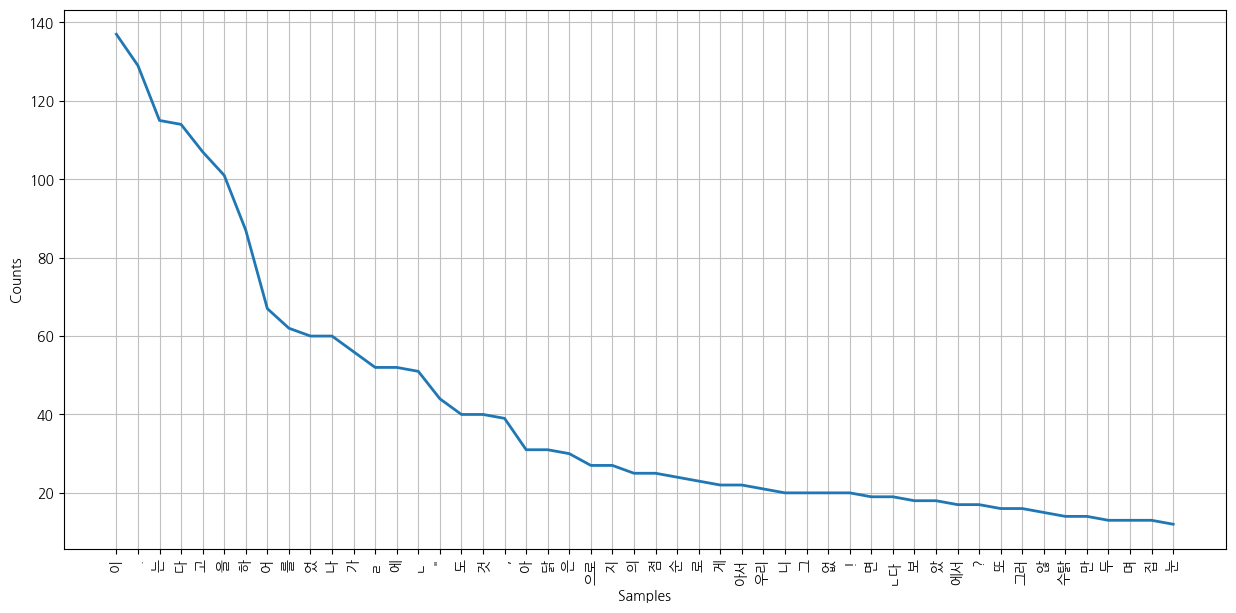

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
import nltk
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

word_counted = nltk.Text(word_cleaned)
plt.figure(figsize=(15,7))
word_counted.plot(50)

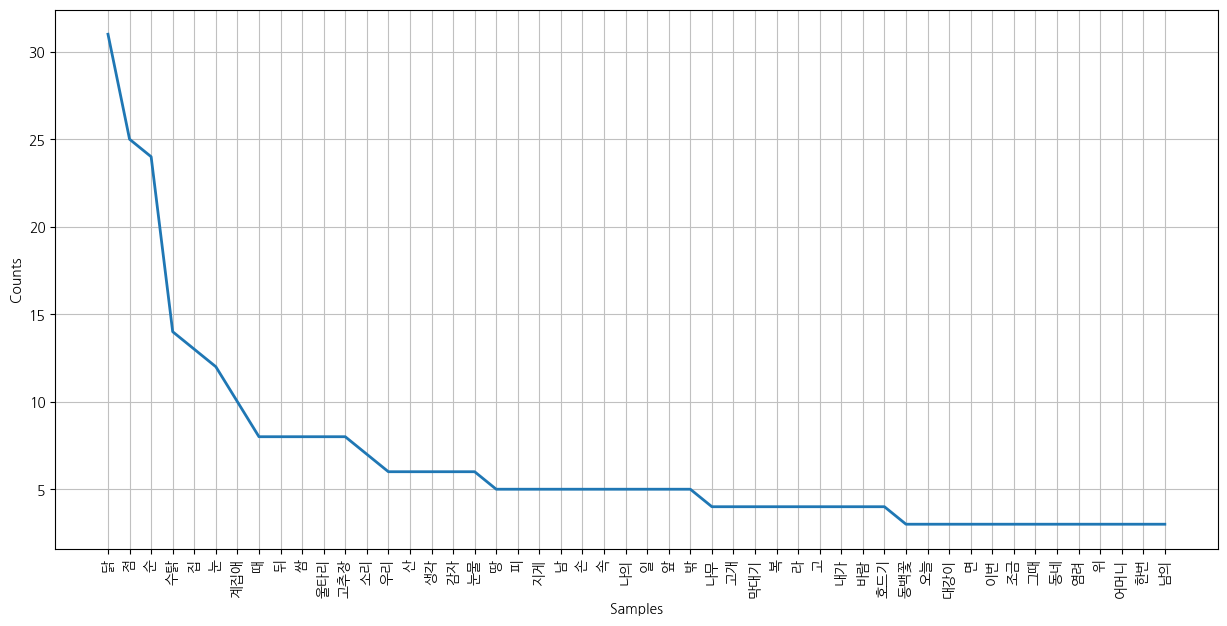

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# 그래프에 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

word_counted = nltk.Text(word_cleaned2)
plt.figure(figsize=(15,7))
word_counted.plot(50)

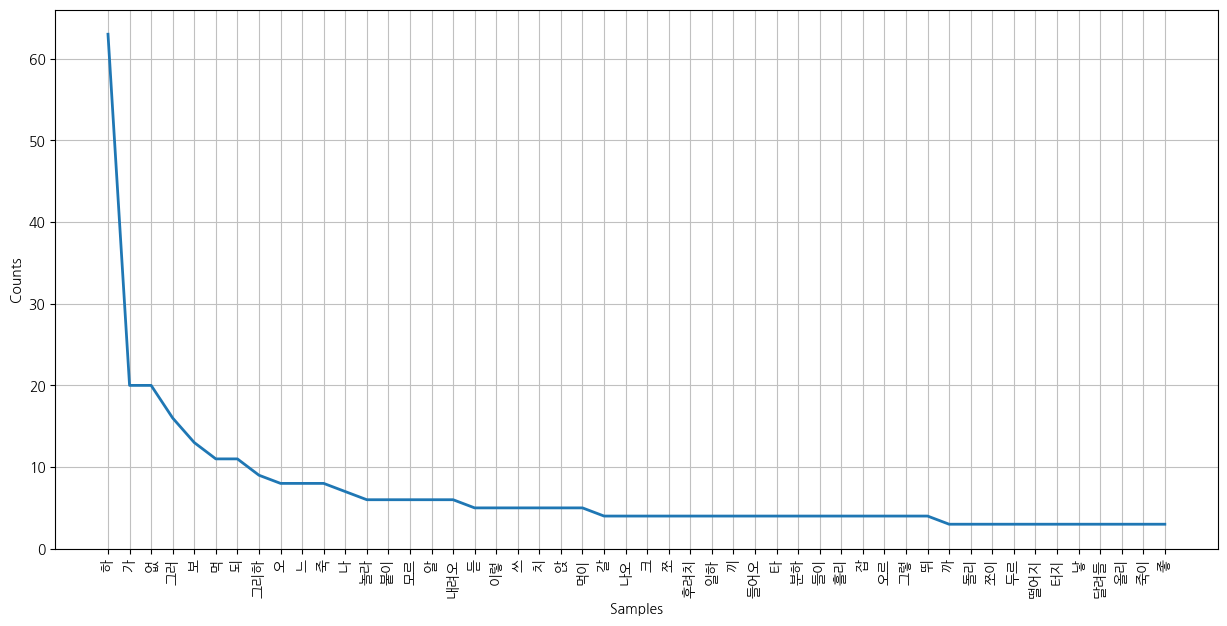

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# 그래프에 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

word_counted = nltk.Text(word_cleaned3)
plt.figure(figsize=(15,7))
word_counted.plot(50)

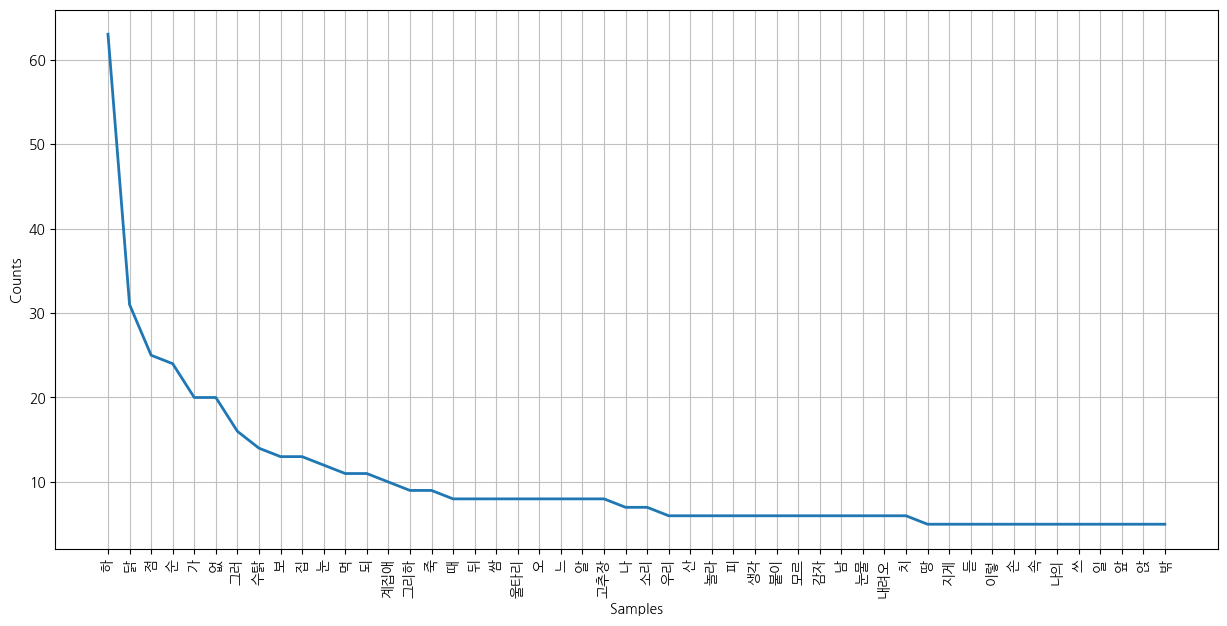

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# 그래프에 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

word_counted = nltk.Text(word_cleaned4)
plt.figure(figsize=(15,7))
word_counted.plot(50)

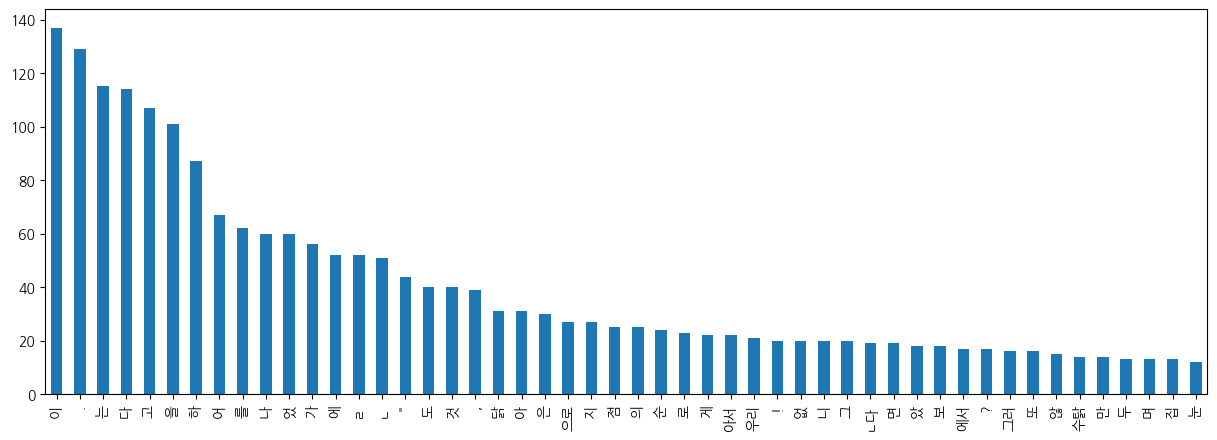

In [ ]:
word_frequency = nltk.FreqDist(word_cleaned)
df = pd.DataFrame(list(word_frequency.values()), word_frequency.keys())

result = df.sort_values([0], ascending = False)
result = result[:50]
result.plot(kind='bar', legend=False, figsize=(15,5))
plt.show()

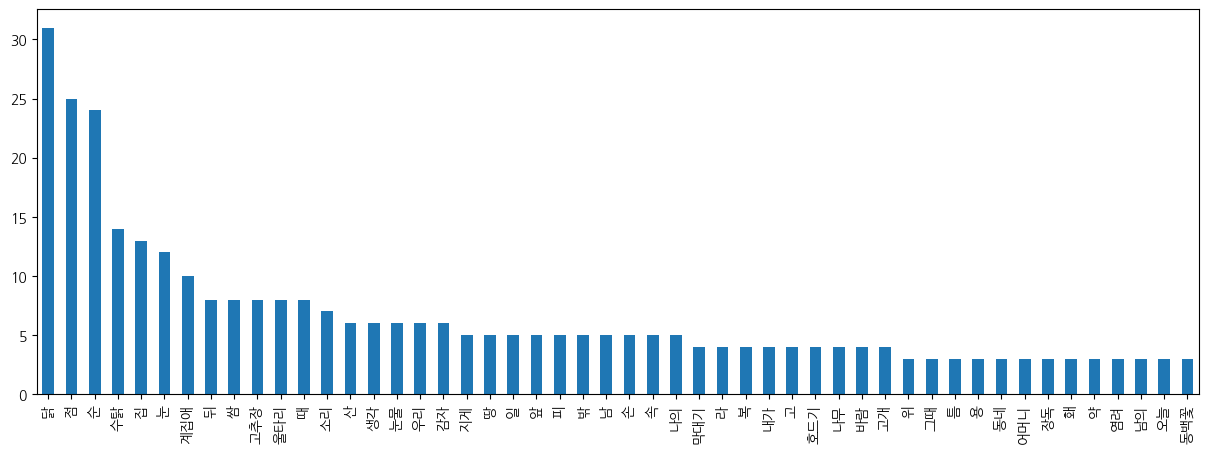

In [ ]:
word_frequency = nltk.FreqDist(word_cleaned2)
df = pd.DataFrame(list(word_frequency.values()), word_frequency.keys())

result = df.sort_values([0], ascending = False)
result = result[:50]
result.plot(kind='bar', legend=False, figsize=(15,5))
plt.show()

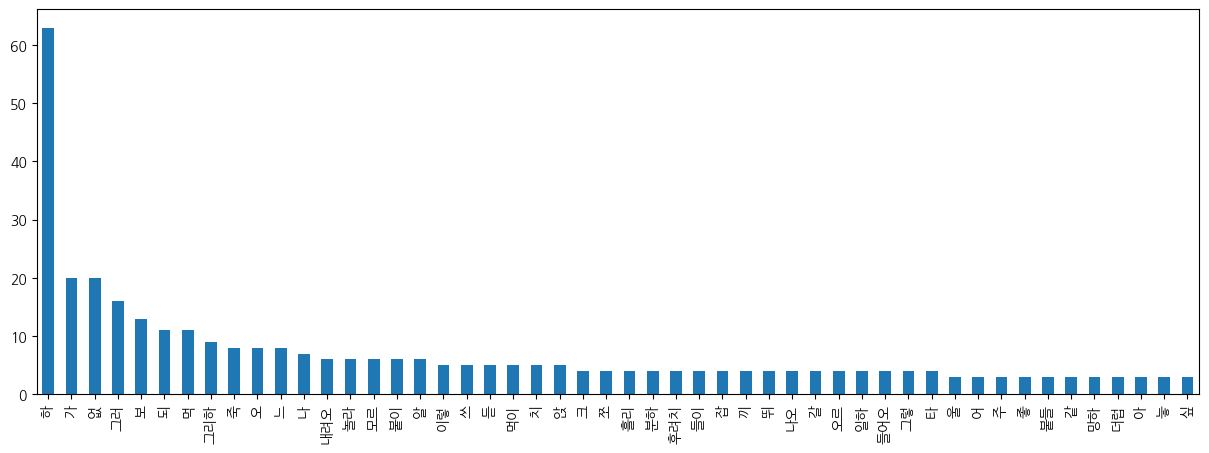

In [ ]:
word_frequency = nltk.FreqDist(word_cleaned3)
df = pd.DataFrame(list(word_frequency.values()), word_frequency.keys())

result = df.sort_values([0], ascending = False)
result = result[:50]
result.plot(kind='bar', legend=False, figsize=(15,5))
plt.show()

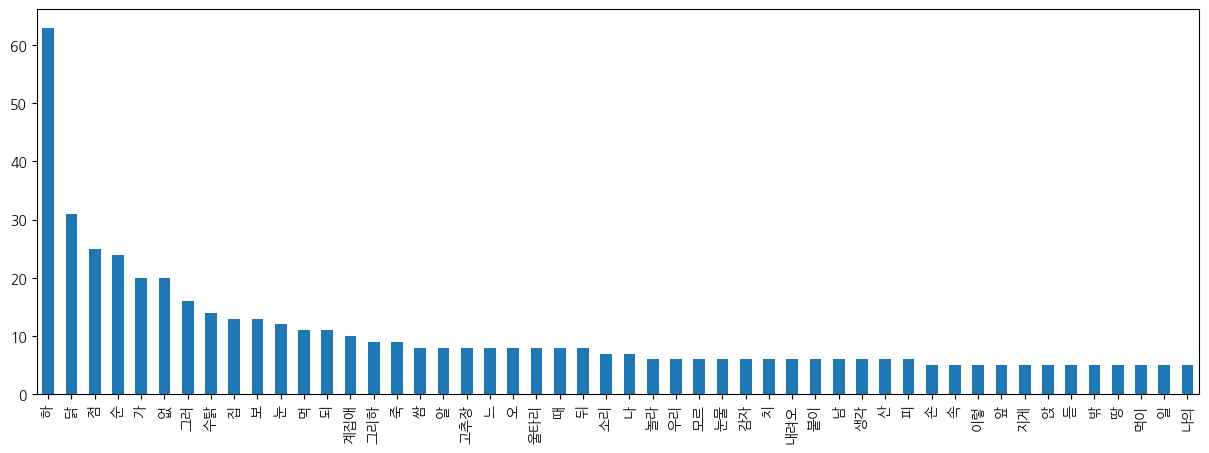

In [ ]:
word_frequency = nltk.FreqDist(word_cleaned4)
df = pd.DataFrame(list(word_frequency.values()), word_frequency.keys())

result = df.sort_values([0], ascending = False)
result = result[:50]
result.plot(kind='bar', legend=False, figsize=(15,5))
plt.show()

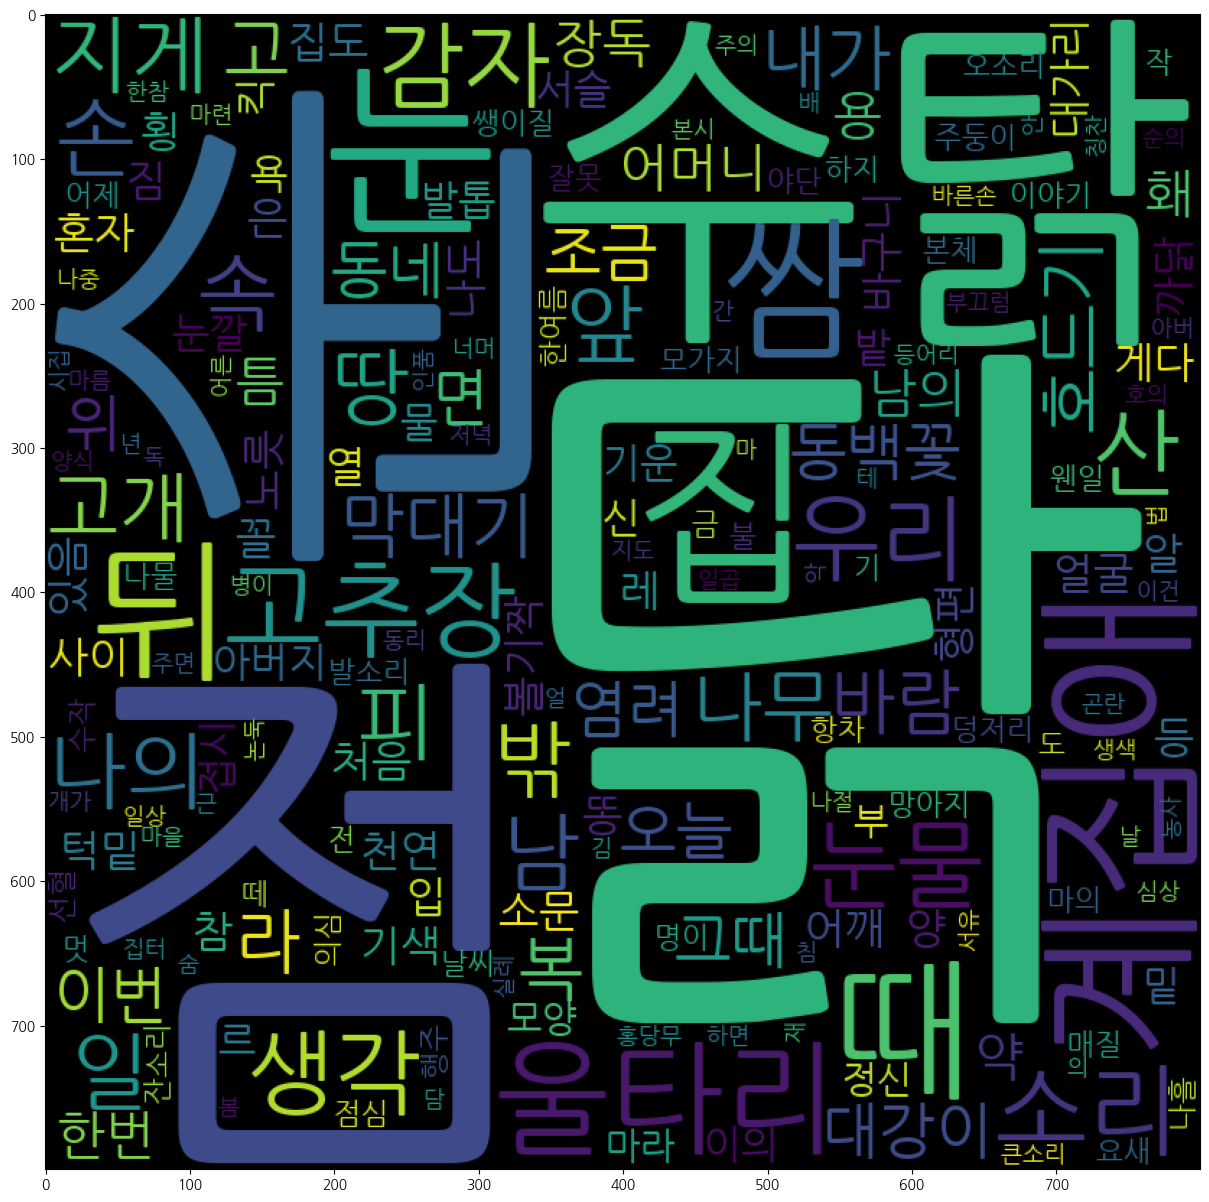

In [ ]:
c = Counter(word_cleaned2)

wc = WordCloud(font_path='NanumGothic', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(15, 15))
plt.imshow(gen)

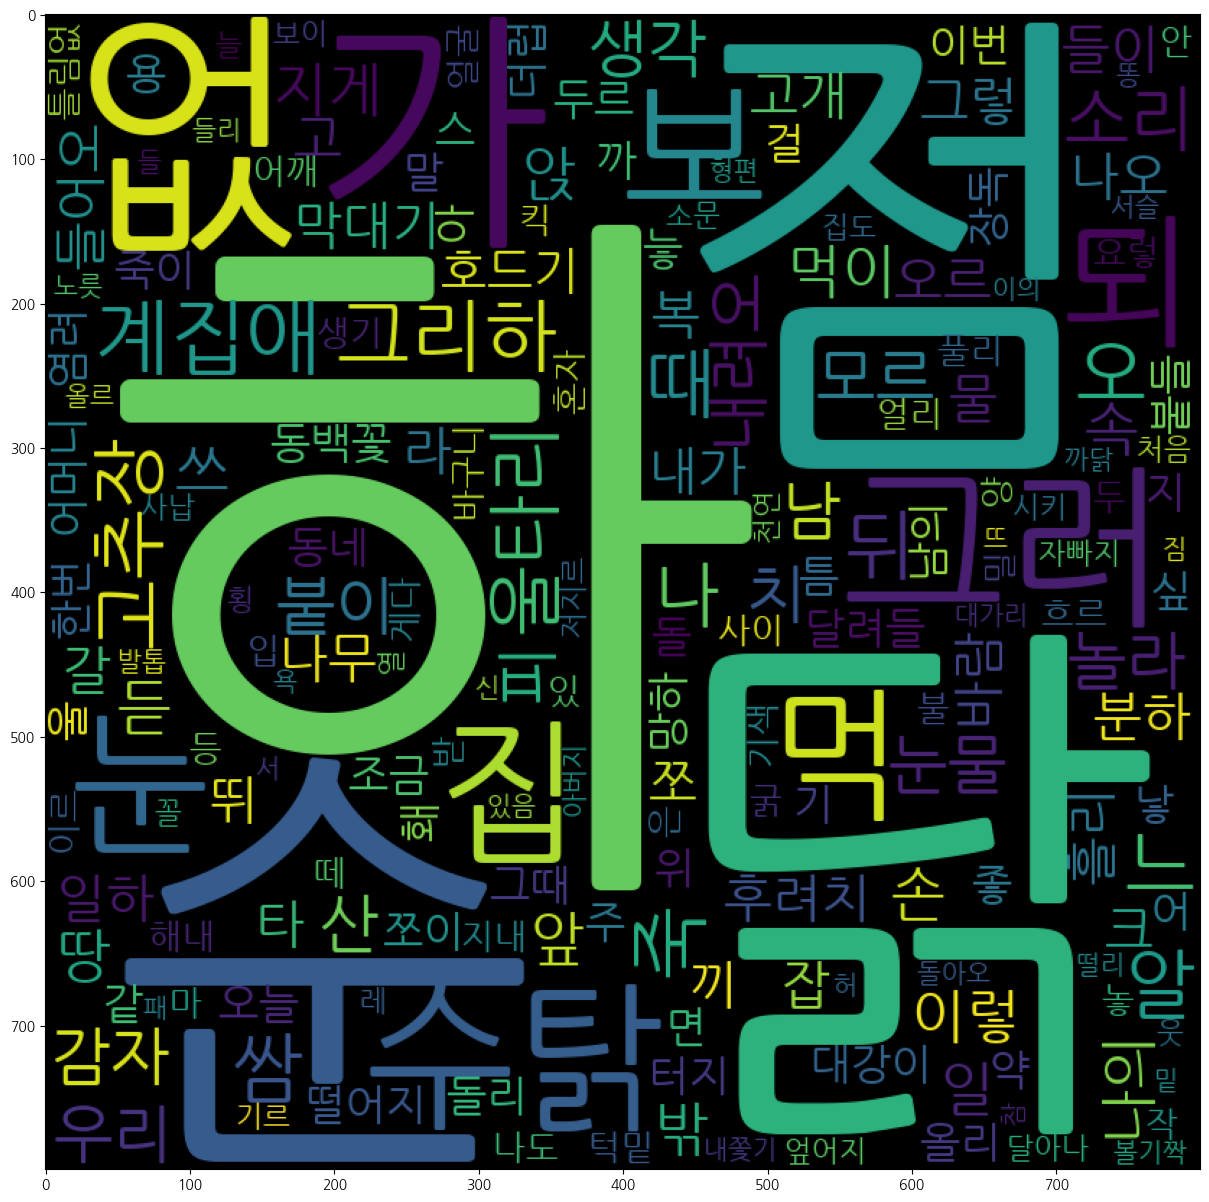

In [ ]:
d = Counter(word_cleaned4)

wc = WordCloud(font_path='NanumGothic', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(d)
plt.figure(figsize=(15, 15))
plt.imshow(gen)

### 2. 일반적인 영문 텍스트를 가지고 아래와 같이 관계 데이터를 그려라.

https://www.gutenberg.org/ <p>
구텐베르크 프로젝트 홈페이지에 가면 무척 많은 영문 소설 및 텍스트 데이터를 얻어 낼 수 있다.    

In [ ]:
import json
import codecs
import itertools
import networkx as nx
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm
from nltk import sent_tokenize, word_tokenize

In [ ]:
def cooccurrence(text, cast):
    possible_pairs = list(itertools.combinations(cast, 2))
    cooccurring = dict.fromkeys(possible_pairs, 0)
    for title, chapter in text['chapters'].items():
        for sent in sent_tokenize(chapter):
            for pair in possible_pairs:
                if pair[0] in sent and pair[1] in sent:
                    cooccurring[pair] += 1
    return cooccurring

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import csv
import json

# CSV 파일 읽기
csv_file_path = '/content/drive/MyDrive/학교 실습 파일/Pooh.csv'

with open(csv_file_path, 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    data = {'items': []}

    # CSV의 각 행을 JSON 데이터로 추가
    for row in csv_reader:
        data['items'].append({
            row[csv_reader.fieldnames[0]]: row[csv_reader.fieldnames[1]]
        })
# JSON 파일 작성
with open('Pooh.json', 'w') as json_file:
    json.dump(data, json_file, indent=2)

from google.colab import files

files.download('Pooh.json')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

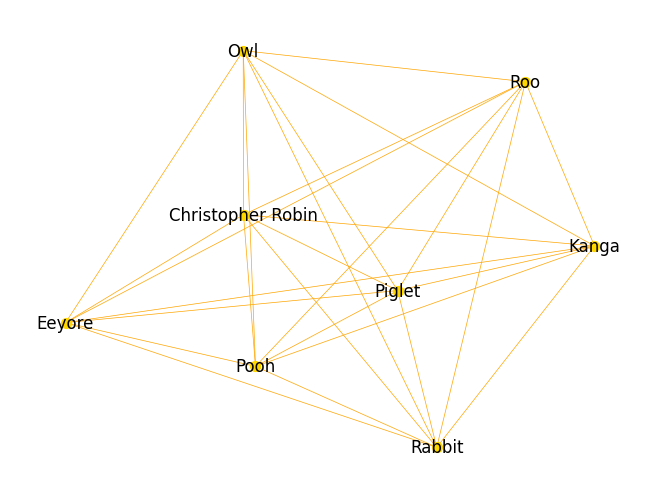

In [ ]:
if __name__ == '__main__':
    # File contains a list of characters, reverse sorted by frequency
    # And a dict with {chapter title: chapter text} key-value pairs
    with codecs.open('/content/drive/MyDrive/학교 실습 파일/Pooh.json', 'r', 'utf-8-sig') as data:
        text = json.load(data)
        cast = text['cast']

        # ##############################################
        # # Build a NetworkX Graph
        # ##############################################
        G = nx.Graph()
        G.name = "Pooh"
        pairs = cooccurrence(text, cast)

        for pair, wgt in pairs.items():
            if wgt>0:
                G.add_edge(pair[0], pair[1], weight=wgt)
        # # Make Pooh the center
        D = nx.ego_graph(G, "Pooh")
        edges, weights = zip(*nx.get_edge_attributes(D, "weight").items())
        # # Push nodes away that are less related to Pooh
        pos = nx.spring_layout(D, k=.5, iterations=40)
        nx.draw(D, pos, node_color="gold", node_size=50, edgelist=edges,
                 width=.5, edge_color="orange", with_labels=True, font_size=12)
        plt.show()